In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline   
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('E://data/weather.csv')

In [137]:
pd.options.display.max_columns = 999

In [141]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [5]:
# wind gust speed is sudden peak in speed in last 5 sec


In [6]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Dealing with the missing values

In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
x = df.isnull().sum()

In [9]:
x.index

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [10]:
z = x.index
a = x.values

for i in range(len(x)):
    percentage = (a[i] / 145460)*100
    
    y = round(percentage,2)
    print('percentage of missing of column {} is '.format(z[i]),y)

percentage of missing of column Date is  0.0
percentage of missing of column Location is  0.0
percentage of missing of column MinTemp is  1.02
percentage of missing of column MaxTemp is  0.87
percentage of missing of column Rainfall is  2.24
percentage of missing of column Evaporation is  43.17
percentage of missing of column Sunshine is  48.01
percentage of missing of column WindGustDir is  7.1
percentage of missing of column WindGustSpeed is  7.06
percentage of missing of column WindDir9am is  7.26
percentage of missing of column WindDir3pm is  2.91
percentage of missing of column WindSpeed9am is  1.21
percentage of missing of column WindSpeed3pm is  2.11
percentage of missing of column Humidity9am is  1.82
percentage of missing of column Humidity3pm is  3.1
percentage of missing of column Pressure9am is  10.36
percentage of missing of column Pressure3pm is  10.33
percentage of missing of column Cloud9am is  38.42
percentage of missing of column Cloud3pm is  40.81
percentage of missi

In [11]:
df.drop(['Date','Sunshine','Evaporation','Cloud9am','Cloud3pm'],axis = 1,inplace = True)

In [12]:
X = df.isnull().sum()

In [13]:
z = X.index
a = X.values

for i in range(len(X)):
    percentage = (a[i] / 145460)*100
    
    y = round(percentage,2)
    print('percentage of missing of column {} is '.format(z[i]),y)

percentage of missing of column Location is  0.0
percentage of missing of column MinTemp is  1.02
percentage of missing of column MaxTemp is  0.87
percentage of missing of column Rainfall is  2.24
percentage of missing of column WindGustDir is  7.1
percentage of missing of column WindGustSpeed is  7.06
percentage of missing of column WindDir9am is  7.26
percentage of missing of column WindDir3pm is  2.91
percentage of missing of column WindSpeed9am is  1.21
percentage of missing of column WindSpeed3pm is  2.11
percentage of missing of column Humidity9am is  1.82
percentage of missing of column Humidity3pm is  3.1
percentage of missing of column Pressure9am is  10.36
percentage of missing of column Pressure3pm is  10.33
percentage of missing of column Temp9am is  1.21
percentage of missing of column Temp3pm is  2.48
percentage of missing of column RainToday is  2.24
percentage of missing of column RainTomorrow is  2.25


In [14]:
df.RainTomorrow  = df.RainTomorrow.dropna()   # dropping the independant column null valuess

In [15]:
df.RainToday.value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [16]:
df.RainToday = df.RainToday.dropna()

# Cheaking the data types of columns

In [17]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [18]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df['MinTemp'] = imp.fit_transform(df[['MinTemp']])

In [19]:
df['MaxTemp'] = imp.fit_transform(df[['MaxTemp']])

In [20]:
df.Rainfall = imp.fit_transform(df[['Rainfall']])

In [21]:
imp0 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [22]:
df.WindGustDir  = imp0.fit_transform(df[['WindGustDir']])

In [23]:
df.WindGustSpeed = imp.fit_transform(df[['WindGustSpeed']])

In [24]:
df.WindDir9am  = imp0.fit_transform(df[['WindDir9am']])

In [25]:
df.WindDir3pm  = imp0.fit_transform(df[['WindDir3pm']])

In [26]:
df.WindSpeed9am  = imp.fit_transform(df[['WindSpeed9am']])

In [27]:
df.WindSpeed3pm  = imp.fit_transform(df[['WindSpeed3pm']])

In [28]:
df.Humidity9am   = imp.fit_transform(df[['Humidity9am']])

In [29]:
df.Humidity3pm   = imp.fit_transform(df[['Humidity3pm']])

In [30]:
df.Pressure9am   = imp.fit_transform(df[['Pressure9am']])

In [31]:
df.Pressure3pm   = imp.fit_transform(df[['Pressure3pm']])

In [32]:
df.Temp9am   = imp.fit_transform(df[['Temp9am']])

In [33]:
df.Temp3pm    = imp.fit_transform(df[['Temp3pm']])

In [34]:
df = df.dropna()

In [35]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


# Cheaking the correlation between columns

In [36]:
df.corr()     # correlation between continuous variable 

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.734443,0.103759,0.174128,0.174925,0.174369,-0.232848,0.005634,-0.424939,-0.434888,0.898943,0.700201
MaxTemp,0.734443,1.000000,-0.074602,0.067117,0.014404,0.050775,-0.501403,-0.500648,-0.309187,-0.397845,0.881743,0.970330
Rainfall,0.103759,-0.074602,1.000000,0.127960,0.086390,0.057067,0.222161,0.250676,-0.160402,-0.120953,0.011426,-0.077917
WindGustSpeed,0.174128,0.067117,0.127960,1.000000,0.578104,0.658961,-0.209102,-0.025713,-0.426801,-0.384838,0.147246,0.032783
WindSpeed9am,0.174925,0.014404,0.086390,0.578104,1.000000,0.513467,-0.268846,-0.031065,-0.214801,-0.164687,0.128623,0.004807
WindSpeed3pm,0.174369,0.050775,0.057067,0.658961,0.513467,1.000000,-0.144387,0.015885,-0.277240,-0.239725,0.162636,0.028725
Humidity9am,-0.232848,-0.501403,0.222161,-0.209102,-0.268846,-0.144387,1.000000,0.660937,0.131064,0.175850,-0.471623,-0.493791
Humidity3pm,0.005634,-0.500648,0.250676,-0.025713,-0.031065,0.015885,0.660937,1.000000,-0.026440,0.048014,-0.218459,-0.556346
Pressure9am,-0.424939,-0.309187,-0.160402,-0.426801,-0.214801,-0.277240,0.131064,-0.026440,1.000000,0.960051,-0.397743,-0.266254
Pressure3pm,-0.434888,-0.397845,-0.120953,-0.384838,-0.164687,-0.239725,0.175850,0.048014,0.960051,1.000000,-0.442379,-0.361531


In [37]:
numerical = df.select_dtypes(include = 'float64')
categorical = df.select_dtypes(exclude = 'float64')

In [38]:
df.RainTomorrow = df.RainTomorrow.apply(lambda x:1 if(x == 'Yes')else 0)

In [39]:
df.RainTomorrow.value_counts()

0    109586
1     31201
Name: RainTomorrow, dtype: int64

In [40]:
df.RainToday = df.RainToday.apply(lambda x:1 if(x == 'Yes')else 0)

In [41]:
df.RainToday.value_counts()

0    109332
1     31455
Name: RainToday, dtype: int64

# Univariate and Bivariate analysis

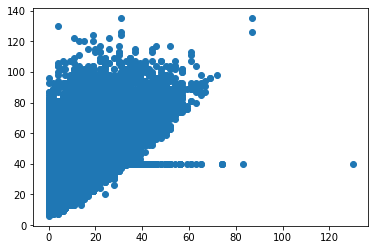

In [42]:

plt.scatter(df.WindSpeed9am,df.WindGustSpeed)

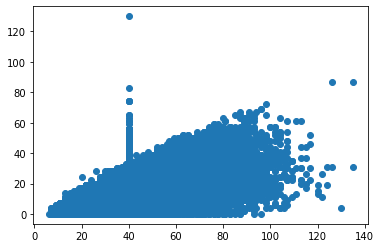

In [43]:
plt.scatter(df.WindGustSpeed,df.WindSpeed9am)

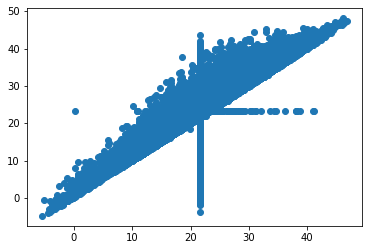

In [44]:
plt.scatter(df.Temp3pm,df.MaxTemp)

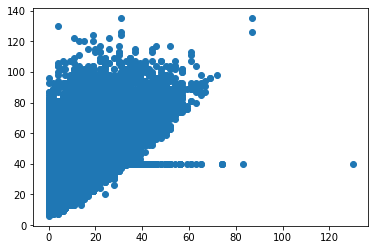

In [45]:
plt.scatter(df.WindSpeed9am,df.WindGustSpeed)

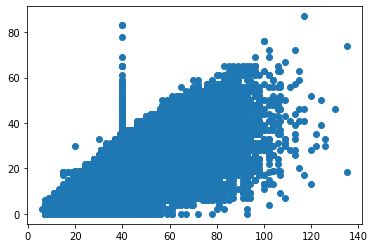

In [46]:
plt.scatter(df.WindGustSpeed,df.WindSpeed3pm)

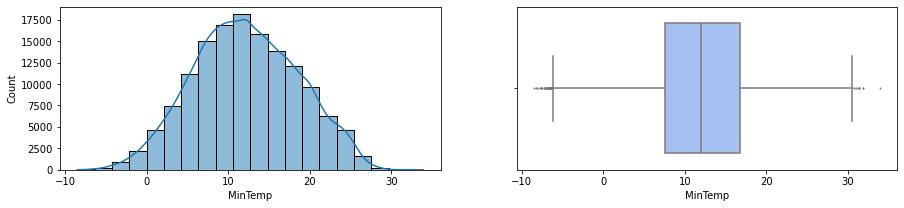

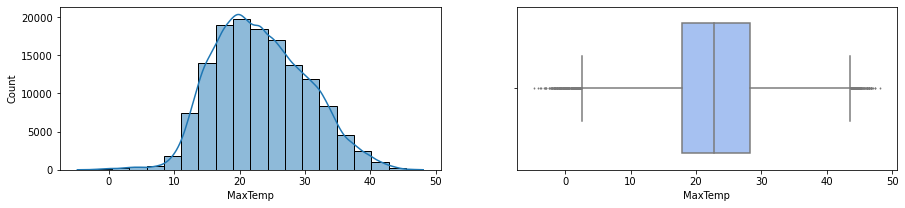

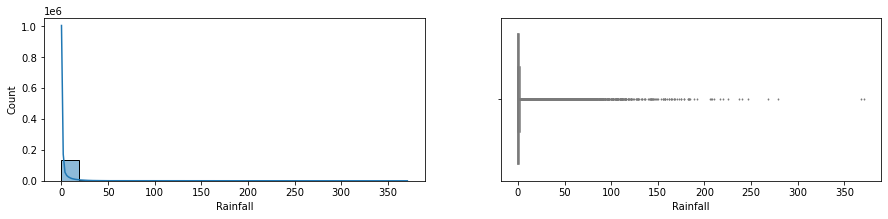

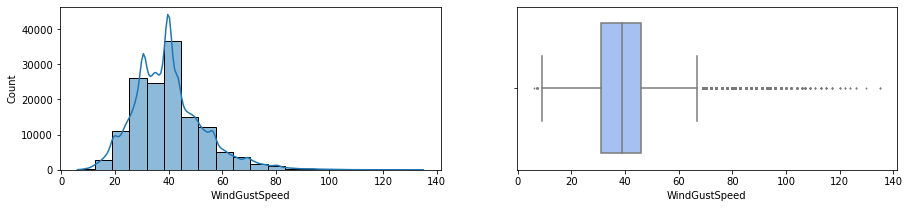

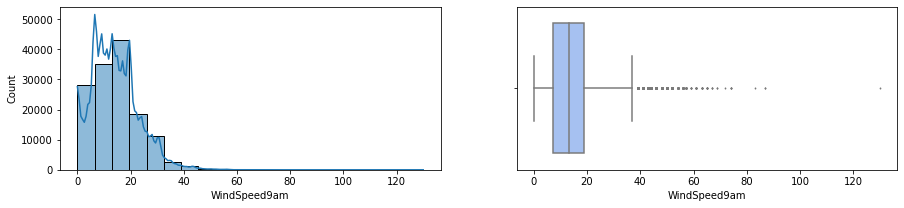

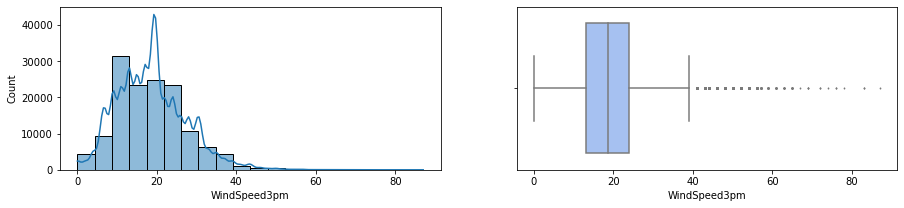

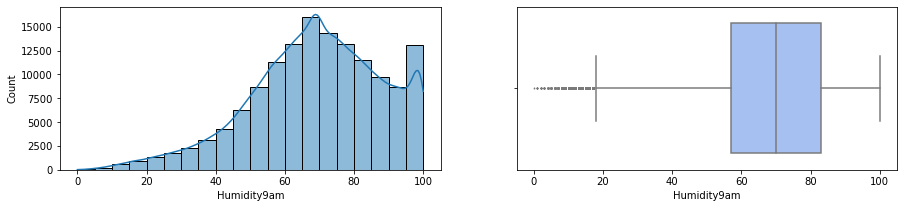

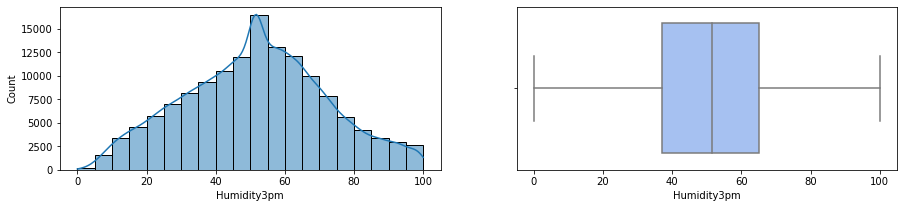

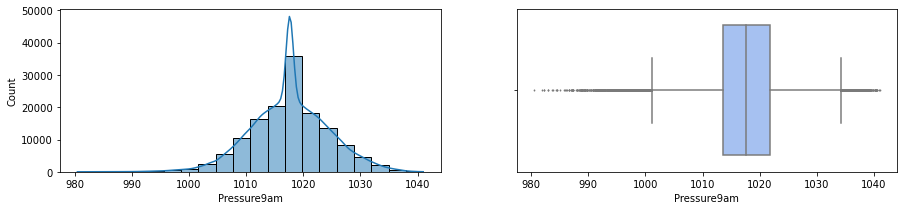

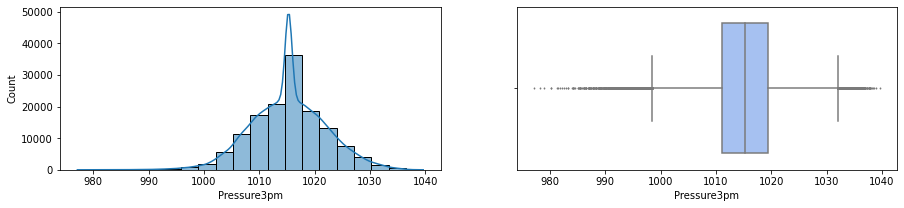

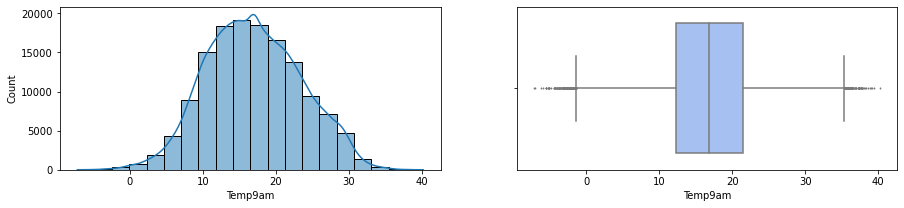

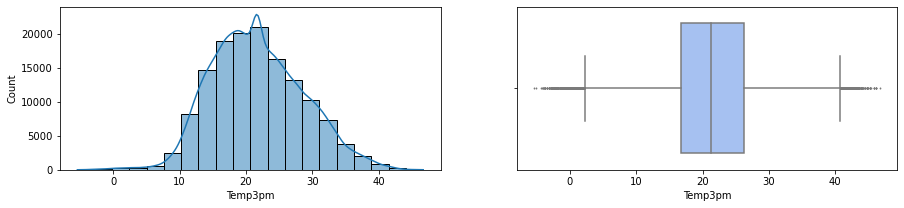

In [47]:
for i in numerical.columns:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(numerical[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(numerical[i], ax = axs[1], color='#99befd', fliersize=1);

# Encoding categorical column

In [48]:
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    print(np.unique(df[col]))
# transform the categorical columns
df = pd.get_dummies(df, columns=categorical_columns)
df.iloc[4:9]

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,...,0,0,0,0,0,0,0,0,0,0
5,Albury,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,...,0,0,0,0,0,0,0,1,0,0
6,Albury,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,...,0,0,0,0,0,0,1,0,0,0
7,Albury,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,...,0,0,0,0,1,0,0,0,0,0
8,Albury,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,...,0,0,0,1,0,0,0,0,0,0


In [146]:
df[['Location', 'MinTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am','WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm','RainToday','WindGustDir', 'WindDir3pm', 'WindDir9am','RainTomorrow']].head(18)

,Location,MinTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,WindGustDir,WindDir3pm,WindDir9am,RainTomorrow
0,Albury,13.4,0.6,44.0,20.0,24.0,71.0,22.0,1007.1,No,W,WNW,W,No
1,Albury,7.4,0.0,44.0,4.0,22.0,44.0,25.0,1007.8,No,WNW,WSW,NNW,No
2,Albury,12.9,0.0,46.0,19.0,26.0,38.0,30.0,1008.7,No,WSW,WSW,W,No
3,Albury,9.2,0.0,24.0,11.0,9.0,45.0,16.0,1012.8,No,NE,E,SE,No
4,Albury,17.5,1.0,41.0,7.0,20.0,82.0,33.0,1006.0,No,W,NW,ENE,No
5,Albury,14.6,0.2,56.0,19.0,24.0,55.0,23.0,1005.4,No,WNW,W,W,No
6,Albury,14.3,0.0,50.0,20.0,24.0,49.0,19.0,1008.2,No,W,W,SW,No
7,Albury,7.7,0.0,35.0,6.0,17.0,48.0,19.0,1010.1,No,W,W,SSE,No
8,Albury,9.7,0.0,80.0,7.0,28.0,42.0,9.0,1003.6,No,NNW,NW,SE,Yes
9,Albury,13.1,1.4,28.0,15.0,11.0,58.0,27.0,1005.7,Yes,W,SSE,S,No


In [49]:
from  sklearn import preprocessing
encode = preprocessing.LabelEncoder()
df.Location = encode.fit_transform(df.Location)
keys = encode.classes_
values = encode.transform(encode.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'Adelaide': 0, 'Albany': 1, 'Albury': 2, 'AliceSprings': 3, 'BadgerysCreek': 4, 'Ballarat': 5, 'Bendigo': 6, 'Brisbane': 7, 'Cairns': 8, 'Canberra': 9, 'Cobar': 10, 'CoffsHarbour': 11, 'Dartmoor': 12, 'Darwin': 13, 'GoldCoast': 14, 'Hobart': 15, 'Katherine': 16, 'Launceston': 17, 'Melbourne': 18, 'MelbourneAirport': 19, 'Mildura': 20, 'Moree': 21, 'MountGambier': 22, 'MountGinini': 23, 'Newcastle': 24, 'Nhil': 25, 'NorahHead': 26, 'NorfolkIsland': 27, 'Nuriootpa': 28, 'PearceRAAF': 29, 'Penrith': 30, 'Perth': 31, 'PerthAirport': 32, 'Portland': 33, 'Richmond': 34, 'Sale': 35, 'SalmonGums': 36, 'Sydney': 37, 'SydneyAirport': 38, 'Townsville': 39, 'Tuggeranong': 40, 'Uluru': 41, 'WaggaWagga': 42, 'Walpole': 43, 'Watsonia': 44, 'Williamtown': 45, 'Witchcliffe': 46, 'Wollongong': 47, 'Woomera': 48}


In [50]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,2,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,...,0,0,0,0,0,0,0,1,0,0
1,2,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,...,1,0,0,0,0,0,0,0,0,0
2,2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,...,0,0,0,0,0,0,0,1,0,0
3,2,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,...,0,0,0,1,0,0,0,0,0,0
4,2,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,...,0,0,0,0,0,0,0,0,0,0


# Removing multicollinearity from the data

In [47]:
df.to_csv('rainfall_cleaned.csv',index = False)

In [51]:
df1 = pd.read_csv('rainfall_cleaned.csv')

In [52]:
categorical_encoded_features = df1.columns[15:]

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
X = df[df.columns]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

           feature        VIF
0         Location   1.065531
1          MinTemp   8.416329
2          MaxTemp  23.386549
3         Rainfall   1.380731
4    WindGustSpeed   2.586556
..             ...        ...
58  WindDir9am_SSW        inf
59   WindDir9am_SW        inf
60    WindDir9am_W        inf
61  WindDir9am_WNW        inf
62  WindDir9am_WSW        inf

[63 rows x 2 columns]


In [128]:
vif_data.iloc[:15,:]

,feature,VIF
0,Location,1.065531
1,MinTemp,8.416329
2,MaxTemp,23.386549
3,Rainfall,1.380731
4,WindGustSpeed,2.586556
5,WindSpeed9am,1.941981
6,WindSpeed3pm,1.987624
7,Humidity9am,3.646857
8,Humidity3pm,5.434596
9,Pressure9am,20.439691


In [53]:
df.drop('Temp3pm',axis = 1,inplace = True)           # temp 3 pm having vif score is highest so have to be dropped

In [65]:
X = df[df.columns]
  
# VIF dataframe
vif_data1 = pd.DataFrame()
vif_data1["feature"] = X.columns
  
# calculating VIF for each feature
vif_data1["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data1)

           feature        VIF
0         Location   1.065512
1          MinTemp   8.375118
2          MaxTemp  11.542717
3         Rainfall   1.378847
4    WindGustSpeed   2.570282
..             ...        ...
57  WindDir9am_SSW        inf
58   WindDir9am_SW        inf
59    WindDir9am_W        inf
60  WindDir9am_WNW        inf
61  WindDir9am_WSW        inf

[62 rows x 2 columns]


In [66]:
vif_data1.iloc[:14,:]   # pressure 3 pm having high value 

,feature,VIF
0,Location,1.065512
1,MinTemp,8.375118
2,MaxTemp,11.542717
3,Rainfall,1.378847
4,WindGustSpeed,2.570282
5,WindSpeed9am,1.939672
6,WindSpeed3pm,1.986921
7,Humidity9am,3.388706
8,Humidity3pm,4.223804
9,Pressure9am,20.136558


In [54]:
df.drop('Pressure9am',axis = 1,inplace = True)

In [68]:
X = df[df.columns]
  
# VIF dataframe
vif_data2 = pd.DataFrame()
vif_data2["feature"] = X.columns
  
# calculating VIF for each feature
vif_data2["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data2)

           feature        VIF
0         Location   1.065509
1          MinTemp   8.267934
2          MaxTemp  11.145676
3         Rainfall   1.378847
4    WindGustSpeed   2.552559
..             ...        ...
56  WindDir9am_SSW        inf
57   WindDir9am_SW        inf
58    WindDir9am_W        inf
59  WindDir9am_WNW        inf
60  WindDir9am_WSW        inf

[61 rows x 2 columns]


In [69]:
vif_data2.iloc[:14,:]

,feature,VIF
0,Location,1.065509
1,MinTemp,8.267934
2,MaxTemp,11.145676
3,Rainfall,1.378847
4,WindGustSpeed,2.552559
5,WindSpeed9am,1.932736
6,WindSpeed3pm,1.986478
7,Humidity9am,3.387812
8,Humidity3pm,4.223804
9,Pressure3pm,1.703159


In [55]:
df.drop('Temp9am',axis = 1,inplace = True)              # droping Temp9am

In [71]:
X = df[df.columns]
  
# VIF dataframe
vif_data3 = pd.DataFrame()
vif_data3["feature"] = X.columns
  
# calculating VIF for each feature
vif_data3["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data3)

            feature       VIF
0          Location  1.065220
1           MinTemp  4.621686
2           MaxTemp  6.151905
3          Rainfall  1.378069
4     WindGustSpeed  2.529425
5      WindSpeed9am  1.921873
6      WindSpeed3pm  1.933429
7       Humidity9am  2.344312
8       Humidity3pm  3.549397
9       Pressure3pm  1.701409
10        RainToday  1.633021
11     RainTomorrow  1.444384
12    WindGustDir_E       inf
13  WindGustDir_ENE       inf
14  WindGustDir_ESE       inf
15    WindGustDir_N       inf
16   WindGustDir_NE       inf
17  WindGustDir_NNE       inf
18  WindGustDir_NNW       inf
19   WindGustDir_NW       inf
20    WindGustDir_S       inf
21   WindGustDir_SE       inf
22  WindGustDir_SSE       inf
23  WindGustDir_SSW       inf
24   WindGustDir_SW       inf
25    WindGustDir_W       inf
26  WindGustDir_WNW       inf
27  WindGustDir_WSW       inf
28     WindDir3pm_E       inf
29   WindDir3pm_ENE       inf
30   WindDir3pm_ESE       inf
31     WindDir3pm_N       inf
32    Wind

In [72]:
vif_data3.iloc[:13,:]

,feature,VIF
0,Location,1.065220
1,MinTemp,4.621686
2,MaxTemp,6.151905
3,Rainfall,1.378069
4,WindGustSpeed,2.529425
5,WindSpeed9am,1.921873
6,WindSpeed3pm,1.933429
7,Humidity9am,2.344312
8,Humidity3pm,3.549397
9,Pressure3pm,1.701409


In [56]:
df.drop('MaxTemp',axis = 1,inplace = True)      # max temp having 

In [74]:
X = df[df.columns]
  
# VIF dataframe
vif_data4 = pd.DataFrame()
vif_data4["feature"] = X.columns
  
# calculating VIF for each feature
vif_data4["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data4)

            feature       VIF
0          Location  1.065214
1           MinTemp  1.565754
2          Rainfall  1.376047
3     WindGustSpeed  2.527478
4      WindSpeed9am  1.831859
5      WindSpeed3pm  1.933428
6       Humidity9am  2.338987
7       Humidity3pm  2.328589
8       Pressure3pm  1.648527
9         RainToday  1.600015
10     RainTomorrow  1.444259
11    WindGustDir_E       inf
12  WindGustDir_ENE       inf
13  WindGustDir_ESE       inf
14    WindGustDir_N       inf
15   WindGustDir_NE       inf
16  WindGustDir_NNE       inf
17  WindGustDir_NNW       inf
18   WindGustDir_NW       inf
19    WindGustDir_S       inf
20   WindGustDir_SE       inf
21  WindGustDir_SSE       inf
22  WindGustDir_SSW       inf
23   WindGustDir_SW       inf
24    WindGustDir_W       inf
25  WindGustDir_WNW       inf
26  WindGustDir_WSW       inf
27     WindDir3pm_E       inf
28   WindDir3pm_ENE       inf
29   WindDir3pm_ESE       inf
30     WindDir3pm_N       inf
31    WindDir3pm_NE       inf
32   WindD

In [75]:
vif_data4.iloc[:12,:]

,feature,VIF
0,Location,1.065214
1,MinTemp,1.565754
2,Rainfall,1.376047
3,WindGustSpeed,2.527478
4,WindSpeed9am,1.831859
5,WindSpeed3pm,1.933428
6,Humidity9am,2.338987
7,Humidity3pm,2.328589
8,Pressure3pm,1.648527
9,RainToday,1.600015


In [85]:
df.to_csv('cleaned_rainfall.csv',index = False)

# Splitting the independant and dependant column 

In [57]:
x = df.drop('RainTomorrow',axis  = 1)
y = df.RainTomorrow

In [58]:
df.RainTomorrow.value_counts()        # the minority class is 1 so the oversampling needs to be done 

0    109586
1     31201
Name: RainTomorrow, dtype: int64

In [59]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE()

In [60]:
X_res, y_res = oversampling.fit_resample(x, y)

# Splitting the data into train test 

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_res,y_res,train_size=0.8,random_state=42)

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
model = LogisticRegression()

lr = model.fit(x_train,y_train)

In [83]:
lr.score(x_train,y_train) 

0.8094184342152541

In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report
model = lr.fit(x_train,y_train)
prediction = model.predict(x_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))


[[17933  3820]
 [ 4481 17601]]
0.8106307744952663
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     21753
           1       0.82      0.80      0.81     22082

    accuracy                           0.81     43835
   macro avg       0.81      0.81      0.81     43835
weighted avg       0.81      0.81      0.81     43835



# Parameter Tunning

In [94]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
space =   {'penalty' :hp.choice('penalty' , ['l1', 'l2', 'elasticnet', 'None']),
           'C': hp.choice('C',[0.001, 0.01, 0.1, 1, 10, 100, 1000]),
            'solver' : hp.choice('solver',['lbfgs','newton-cg','liblinear','sag','saga']),
           'max_iter' : hp.choice('max_iter',[100, 1000,2500, 5000])}


In [95]:
def objective(space):
    model5 = LogisticRegression(penalty = space['penalty'],
                               C = space['C'],
                               solver = space['solver'],
                               max_iter = space['max_iter'])
        
       
    
    accuracy = cross_val_score(model5, x_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [96]:
def objective(space):
    model5 = LogisticRegression(penalty = space['penalty'],
                               C = space['C'],
                               solver = space['solver'],
                               max_iter = space['max_iter'])
        
       
    
    accuracy = cross_val_score(model5, x_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [97]:
from sklearn.model_selection import cross_val_score
import time
best = fmin(fn = objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 5,
            trials= Trials())

best

100%|█████████████████████████████████████████████████| 5/5 [04:02<00:00, 48.52s/trial, best loss: -0.8926010987085682]


{'C': 4, 'max_iter': 3, 'penalty': 1, 'solver': 1}

In [98]:
penal = {0: 'l1', 1: 'l2',2:'elasticnet',3:None}
c = {0:0.001,1: 0.01, 2:0.1,3: 1, 4:10, 5:100, 6:1000}
est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200,5:1300,6:1500}
sol ={0:'lbfgs',1:'newton-cg',2:'liblinear',3:'sag',4:'saga'}
max_i = {0:100,1: 1000,2:2500,3: 5000}


print(penal[best['penalty']])
print(c[best['C']])
print(sol[best['solver']])
print(max_i[best['max_iter']])

l2
10
newton-cg
5000


In [99]:
LR2= LogisticRegression(penalty = penal[best['penalty']],
                                      C = c[best['C']],
                                     solver =  sol[best['solver']],
                                     max_iter  = max_i[best['max_iter']])
model2 = LR2.fit(x_train,y_train)
prediction = model2.predict(x_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[20491  1262]
 [ 3392 18690]]
0.8938291319721684
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     21753
           1       0.94      0.85      0.89     22082

    accuracy                           0.89     43835
   macro avg       0.90      0.89      0.89     43835
weighted avg       0.90      0.89      0.89     43835



In [118]:
import pickle
pickle.dump(LR2, open("Logistic_rain_prediction.pkl", "wb"))

In [119]:
LR2

LogisticRegression(C=10, max_iter=5000, solver='newton-cg')

# Naive bayes classifier

In [113]:
from sklearn.naive_bayes import GaussianNB

In [122]:
gnb = GaussianNB()

In [123]:
gnb.fit(x_scale_train,y_train)

GaussianNB()

In [124]:
gnb.score(x_scale_test,y_test)

0.8251169157066272

# KNN algorithm 

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler

In [106]:
sc = RobustScaler()

In [107]:
x_scale_train = sc.fit_transform(x_train)
x_scale_test  = sc.transform(x_test)

In [108]:
knn = KNeighborsClassifier()
knn.fit(x_scale_train, y_train)

KNeighborsClassifier()

In [111]:
y_pred = knn.predict(x_scale_test)

In [109]:
knn.score(x_scale_test,y_test)

0.8765370138017566

In [112]:
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[18448  3305]
 [ 2107 19975]]
Accuracy Score 0.8765370138017566
Classification report:               precision    recall  f1-score   support

           0       0.90      0.85      0.87     21753
           1       0.86      0.90      0.88     22082

    accuracy                           0.88     43835
   macro avg       0.88      0.88      0.88     43835
weighted avg       0.88      0.88      0.88     43835



# Random Forest Classifier

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
random_forest = RandomForestClassifier()
model = random_forest.fit(x_train, y_train)

In [128]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report
prediction = model.predict(x_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[20189  1564]
 [ 2599 19483]]
0.905030226987567
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     21753
           1       0.93      0.88      0.90     22082

    accuracy                           0.91     43835
   macro avg       0.91      0.91      0.91     43835
weighted avg       0.91      0.91      0.90     43835



In [129]:
model.score(x_train,y_train)

0.9998460108248687

In [145]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
import numpy as np
space =   {'n_estimators' :hp.choice('n_estimators' , [int(x) for x in range(100,200,10)]),
           'max_features': hp.choice('max_features',['auto', 'sqrt']),
            'max_depth' : hp.choice('max_depth', [20,30,40,50,60,70,80,90,100,120]),
           'min_samples_split' : hp.choice('min_sa,ples_split',[2, 5, 10]),
           'min_samples_leaf' : hp.choice('min_samples_leaf',  [1, 2, 4]),
           'bootstrap' : True}


In [146]:
def objective(space):
    model1 = RandomForestClassifier(n_estimators = space['n_estimators'],
                                    max_features = space['max_features'],
                                    max_depth = space['max_depth'],
                                    min_samples_split = space['min_samples_split'],
                                    min_samples_leaf = space['min_samples_leaf'],
                                    bootstrap = space['bootstrap'])
        
       
    
    accuracy = cross_val_score(model1, x_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [147]:
from sklearn.model_selection import cross_val_score

best = fmin(fn = objective,
            space= space, 
            algo= tpe.suggest,
            max_evals = 5,
            trials= Trials())
best

100%|████████████████████████████████████████████████| 5/5 [32:48<00:00, 393.75s/trial, best loss: -0.8992910694910549]


{'max_depth': 2,
 'max_features': 0,
 'min_sa,ples_split': 2,
 'min_samples_leaf': 0,
 'n_estimators': 3}

In [162]:
max_depth = 40
max_features = 'auto'
min_samples_split = 10
min_samples_leaf = 1
n_estimators = 130

In [166]:
random_forest_tunned = RandomForestClassifier(max_depth =  max_depth,max_features = max_features, min_samples_split = min_samples_split,min_samples_leaf = min_samples_leaf,n_estimators = 130)
model_ = random_forest_tunned.fit(x_train, y_train)

In [167]:
random_forest_tunned.score(x_test,y_test)

0.9020417474620737

In [168]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report
prediction = random_forest_tunned.predict(x_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[20167  1586]
 [ 2708 19374]]
0.9020417474620737
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     21753
           1       0.92      0.88      0.90     22082

    accuracy                           0.90     43835
   macro avg       0.90      0.90      0.90     43835
weighted avg       0.90      0.90      0.90     43835



In [169]:
import pickle
pickle.dump(random_forest_tunned, open("Randomforest_rain_prediction.pkl", "wb"))

In [149]:
df.columns

Index(['Location', 'MinTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm',
       'RainToday', 'RainTomorrow', 'WindGustDir_E', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE',
       'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE',
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir9am_E', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
       'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
       'Wind

In [62]:
categorical_encoded_features

Index(['WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
       'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW',
       'WindDir9am_WSW'],
      dtype='object')

In [148]:
df.Location

0          2
1          2
2          2
3          2
4          2
          ..
145454    41
145455    41
145456    41
145457    41
145458    41
Name: Location, Length: 140787, dtype: int32

In [63]:
df.columns

Index(['Location', 'MinTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm',
       'RainToday', 'RainTomorrow', 'WindGustDir_E', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE',
       'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE',
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir9am_E', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
       'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
       'Wind

In [64]:
x_train.columns

Index(['Location', 'MinTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm',
       'RainToday', 'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE',
       'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
       'Wi

In [162]:
x_train.WindGustSpeed

191594    47.764971
104452    44.000000
129510    31.000000
114779    46.000000
150476    51.278649
            ...    
119879    43.000000
103694    37.000000
131932    37.000000
146867    59.000000
121958    50.000000
Name: WindGustSpeed, Length: 175337, dtype: float64

In [67]:
import pickle
model = pickle.load(open("Randomforest_rain_prediction.pkl", "rb"))


category = ['E','ENE','ESE','N','NE','NNE','NNW','NW','S','SE','SSE','SSW','SW','W','WNW','WSW']

In [68]:
len(category)

16

In [74]:
cat= []
for i in category:
    if i == 'E':
        cat.append(1)
    else:
        cat.append(0)
        

In [92]:
cat  + [1,0,2]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2]

In [76]:
loc = {'Adelaide': 0, 'Albany': 1, 'Albury': 2, 'AliceSprings': 3, 'BadgerysCreek': 4, 'Ballarat': 5, 'Bendigo': 6, 'Brisbane': 7, 'Cairns': 8, 'Canberra': 9, 'Cobar': 10, 'CoffsHarbour': 11, 'Dartmoor': 12, 'Darwin': 13, 'GoldCoast': 14, 'Hobart': 15, 'Katherine': 16, 'Launceston': 17, 'Melbourne': 18, 'MelbourneAirport': 19, 'Mildura': 20, 'Moree': 21, 'MountGambier': 22, 'MountGinini': 23, 'Newcastle': 24, 'Nhil': 25, 'NorahHead': 26, 'NorfolkIsland': 27, 'Nuriootpa': 28, 'PearceRAAF': 29, 'Penrith': 30, 'Perth': 31, 'PerthAirport': 32, 'Portland': 33, 'Richmond': 34, 'Sale': 35, 'SalmonGums': 36, 'Sydney': 37, 'SydneyAirport': 38, 'Townsville': 39, 'Tuggeranong': 40, 'Uluru': 41, 'WaggaWagga': 42, 'Walpole': 43, 'Watsonia': 44, 'Williamtown': 45, 'Witchcliffe': 46, 'Wollongong': 47, 'Woomera': 48}

In [86]:
for i in loc:
    if i == 'Albany':
        j = loc['Albany']
        print(j)

1


In [89]:
loc['Adelaide']

int

In [93]:
x_train.

,Location,MinTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
191594,27,17.95128,3.060837,63.00000,30.000000,38.113054,83.330418,78.226109,1012.712180,0,...,0,0,0,0,0,0,0,0,0,0
104452,48,12.00000,0.000000,44.00000,13.000000,26.000000,52.000000,26.000000,1014.300000,0,...,0,0,0,0,0,0,0,0,0,0
129510,17,2.60000,0.000000,31.00000,2.000000,15.000000,81.000000,56.000000,1023.600000,0,...,0,0,0,0,0,0,0,0,0,0
114779,32,11.00000,0.000000,46.00000,26.000000,28.000000,53.000000,90.000000,1007.000000,0,...,1,0,0,0,0,0,0,0,0,0
150476,24,13.43171,0.000000,40.03523,1.496156,28.831198,50.833760,72.664958,1014.731255,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
model

RandomForestClassifier(max_depth=40, min_samples_split=10, n_estimators=130)

In [98]:
x_train.columns

Index(['Location', 'MinTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm',
       'RainToday', 'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE',
       'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
       'Wi

In [105]:
df.WindDir9am.unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [106]:
len(df.WindGustDir.unique())

17

In [107]:
len(df.WindDir3pm.unique())

17

In [111]:
x = ['E','ENE','ESE','N','NE','NNE','NNW','NW','S','SE','SSE','SSW','SW','W','WNW','WSW']

TypeError: list indices must be integers or slices, not str

In [122]:

x = []
y =loc['AliceSprings']

In [123]:
x.append(y)

In [124]:
x

[3]

In [125]:
loc

{'Adelaide': 0,
 'Albany': 1,
 'Albury': 2,
 'AliceSprings': 3,
 'BadgerysCreek': 4,
 'Ballarat': 5,
 'Bendigo': 6,
 'Brisbane': 7,
 'Cairns': 8,
 'Canberra': 9,
 'Cobar': 10,
 'CoffsHarbour': 11,
 'Dartmoor': 12,
 'Darwin': 13,
 'GoldCoast': 14,
 'Hobart': 15,
 'Katherine': 16,
 'Launceston': 17,
 'Melbourne': 18,
 'MelbourneAirport': 19,
 'Mildura': 20,
 'Moree': 21,
 'MountGambier': 22,
 'MountGinini': 23,
 'Newcastle': 24,
 'Nhil': 25,
 'NorahHead': 26,
 'NorfolkIsland': 27,
 'Nuriootpa': 28,
 'PearceRAAF': 29,
 'Penrith': 30,
 'Perth': 31,
 'PerthAirport': 32,
 'Portland': 33,
 'Richmond': 34,
 'Sale': 35,
 'SalmonGums': 36,
 'Sydney': 37,
 'SydneyAirport': 38,
 'Townsville': 39,
 'Tuggeranong': 40,
 'Uluru': 41,
 'WaggaWagga': 42,
 'Walpole': 43,
 'Watsonia': 44,
 'Williamtown': 45,
 'Witchcliffe': 46,
 'Wollongong': 47,
 'Woomera': 48}

In [128]:
x = [1,2]


In [130]:
x = x + [0,2]

In [131]:
x

[1, 2, 0, 2]